In [1]:
from results_loader import load_data
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Reset_index makes a column called "index" with the column index
df = load_data('nontesting').reset_index()

In [3]:
def maybe_dictionary_len(d):
    if d != None:
        num_non_link = 0
        for k in d:
            dep_data = d[k]
            if not ("link" in dep_data and dep_data["link"]):
                num_non_link = num_non_link + 1
        return num_non_link
    else:
        return np.nan
        
df['npm_number_deps'] = df['npm solve'].apply(maybe_dictionary_len)
df['rosette_number_deps'] = df['rosette solve'].apply(maybe_dictionary_len)

In [4]:
df['ratio_num_deps'] = df['rosette_number_deps']/df['npm_number_deps']

In [5]:
df['ratio'] = df['rosette time'] / df['npm time']

In [6]:
df

,index,project_name,npm success,npm time,npm solve,npm error,rosette success,rosette time,rosette solve,rosette error,npm_number_deps,rosette_number_deps,ratio_num_deps,ratio
0,0,supports-color,True,8.840439,"{'node_modules/has-flag': {'version': '5.0.1',...",None,True,2.382267,"{'node_modules/has-flag': {'version': '5.0.0',...",None,1.0,1.0,1.0,0.269474
1,1,debug,True,9.247350,"{'node_modules/ms': {'version': '2.1.2', 'reso...",None,True,2.343069,"{'node_modules/ms': {'version': '2.1.2', 'inte...",None,1.0,1.0,1.0,0.253377
2,2,semver,True,3.341806,{'node_modules/lru-cache': {'version': '6.0.0'...,None,True,2.364619,{'node_modules/lru-cache': {'version': '6.0.0'...,None,2.0,2.0,1.0,0.707587
3,3,chalk,True,9.310416,{'node_modules/ansi-styles': {'version': '4.3....,None,True,2.493104,{'node_modules/ansi-styles': {'version': '4.1....,None,5.0,5.0,1.0,0.267776
4,4,ms,True,2.577305,{},None,True,2.137862,{},None,0.0,0.0,NaN,0.829495
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,is-directory,True,3.481128,{},None,True,2.414831,{},None,0.0,0.0,NaN,0.693692
996,996,whatwg-fetch,True,9.195429,{},None,True,2.465897,{},None,0.0,0.0,NaN,0.268165
997,997,decimal.js,True,0.402953,{},None,True,2.446546,{},None,0.0,0.0,NaN,6.071548
998,998,lodash.merge,True,0.403490,{},None,True,2.449112,{},None,0.0,0.0,NaN,6.069827


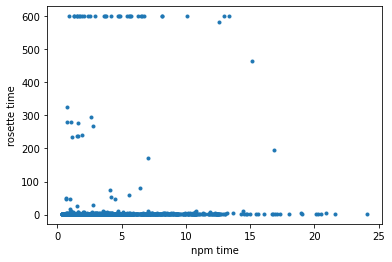

In [7]:
plt.scatter(x=df['npm time'], y=df['rosette time'], marker='.')
plt.xlabel('npm time') #x label
plt.ylabel('rosette time') #y label
plt.show()

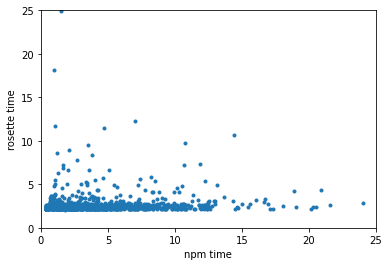

In [8]:
plt.scatter(x=df['npm time'], y=df['rosette time'], marker='.')
plt.xlabel('npm time') #x label
plt.ylabel('rosette time') #y label
plt.ylim([0, 25])
plt.xlim([0, 25])
plt.show()

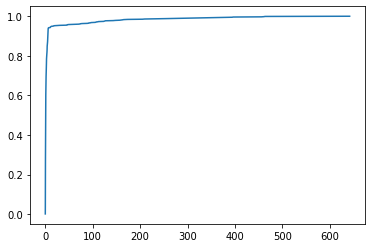

In [9]:
plt.plot(np.sort(df['ratio']), np.arange(1, len(df)+1)/len(df))
plt.show()

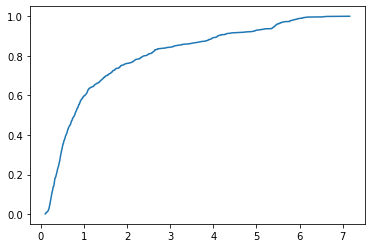

In [10]:
non_outlier_ratio = df['ratio'][df['ratio'] < 10]

plt.plot(np.sort(non_outlier_ratio), np.arange(1, len(non_outlier_ratio)+1)/len(non_outlier_ratio))
plt.show()

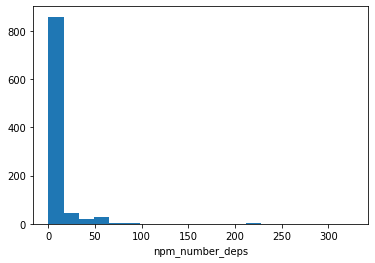

In [11]:
plt.hist(df['npm_number_deps'], bins=20)
plt.xlabel('npm_number_deps');

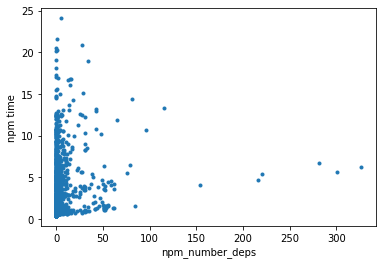

In [12]:
plt.scatter(x=df['npm_number_deps'], y=df['npm time'], marker='.')
plt.xlabel('npm_number_deps') #x label
plt.ylabel('npm time') #y label
plt.show()

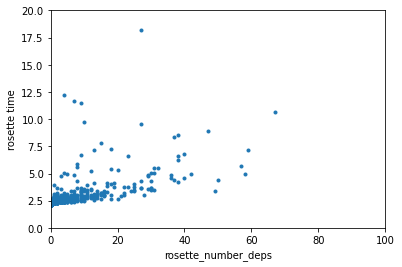

In [13]:
plt.scatter(x=df['rosette_number_deps'], y=df['rosette time'], marker='.')
plt.xlabel('rosette_number_deps') #x label
plt.ylabel('rosette time') #y label
plt.xlim([0, 100])
plt.ylim([0, 20])
plt.show()

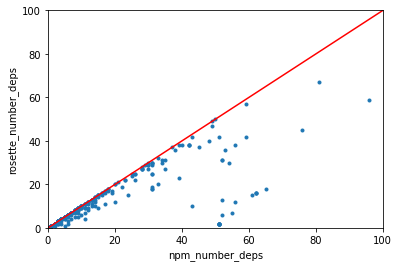

In [14]:
plt.scatter(x=df['npm_number_deps'], y=df['rosette_number_deps'], marker='.')
plt.plot([0, 100], [0, 100], color='r')
plt.xlabel('npm_number_deps') #x label
plt.ylabel('rosette_number_deps') #y label
plt.xlim([0, 100])
plt.ylim([0, 100])
plt.show()

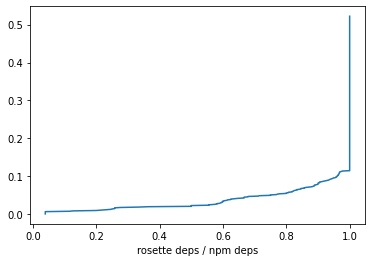

In [15]:
plt.plot(np.sort(df['ratio_num_deps']), np.arange(1, len(df['ratio_num_deps'])+1)/len(df['ratio_num_deps']))
plt.xlabel('rosette deps / npm deps')
plt.show()